In [1]:
# IMPORT
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import Path

# bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool, Legend, ColumnDataSource, Title
from bokeh.tile_providers import get_provider, CARTODBPOSITRON
from bokeh.models import GeoJSONDataSource

output_notebook()

Loading BokehJS ...

# Data Preprocessing

**Clean and export `air_quality_data.csv`**

**Clean and export `air_quality_stations.csv`**

# Visualisations

Load and join tables

In [3]:
# load air quality stations
df_stations = pd.read_csv('shared_data/air_quality/air_quality_stations.csv')
# load air quality data
df = pd.read_csv('data/air_quality_data.csv')
# converting Date to datetime type
df["datetime"] = pd.to_datetime(df["datetime"])
# merge with air quality stations
df = pd.merge(df, df_stations, left_on = 'PUNTO_MUESTREO', right_on='punto_muestreo', how='left').drop('PUNTO_MUESTREO', axis=1)
df.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,value,datetime,punto_muestreo,name,longitude,latitude,altitude,utm_x,utm_y
0,28,79,4,1,7.0,2016-04-01 01:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
1,28,79,4,1,8.0,2016-04-02 01:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
2,28,79,4,1,10.0,2016-04-03 01:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
3,28,79,4,1,7.0,2016-04-04 01:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
4,28,79,4,1,8.0,2016-04-05 01:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06


In [4]:
print('AIR QUALITY STATION NAMES:')
df.name.unique()

AIR QUALITY STATION NAMES:


array(['Plaza de España', 'Escuelas Aguirre', 'Ramón y Cajal',
       'Arturo Soria', 'Villaverde', 'Farolillo', 'Casa de Campo',
       'Barajas Pueblo', 'Plaza del Carmen', 'Moratalaz',
       'Cuatro Caminos', 'Barrio del Pilar', 'Vallecas', 'Méndez Álvaro',
       'Castellana', 'Retiro', 'Plaza Castilla', 'Ensanche de Vallecas',
       'Urbanización Embajada', 'Plaza Elíptica', 'Sanchinarro',
       'El Pardo', 'Juan Carlos I', 'Tres Olivos'], dtype=object)

Choose a location (station `name`) and a gas to track (`MAGNITUD` id):

In [5]:
aLocation = 'Plaza de España'
aMagnitud = 8 #NO2

df_focus = df[(df.name == aLocation) & (df.MAGNITUD==aMagnitud)]
df_focus.sort_values('datetime')

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,value,datetime,punto_muestreo,name,longitude,latitude,altitude,utm_x,utm_y
1944765,28,79,4,8,57.0,2016-01-01 01:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
1949446,28,79,4,8,55.0,2016-01-01 02:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
1954127,28,79,4,8,57.0,2016-01-01 03:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
1958808,28,79,4,8,54.0,2016-01-01 04:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
1963489,28,79,4,8,51.0,2016-01-01 05:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103229,28,79,4,8,0.0,2021-10-25 20:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
7107291,28,79,4,8,0.0,2021-10-25 21:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
7111353,28,79,4,8,0.0,2021-10-25 22:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06
7115415,28,79,4,8,0.0,2021-10-25 23:00:00,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06


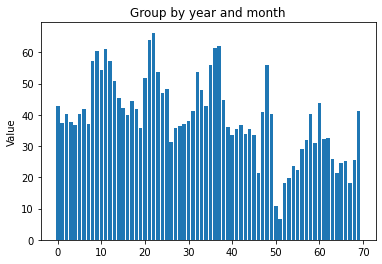

In [6]:
# plot bars
heights = df_focus.groupby([df_focus.datetime.dt.year, df_focus.datetime.dt.month]).mean().value.values
plt.bar(range(len(heights)), heights)
plt.title('Group by year and month')
plt.ylabel('Value')
plt.show()

### Air Quality Stations (map)

In [8]:
# load MC area
cm_points = pd.read_csv('shared_data/districts/central_madrid_points.csv')

# red = outside MC, blue = inside MC

points = df_stations[["utm_x", "utm_y"]].values
path = Path(cm_points[["utm_x", "utm_y"]].values)
points_in_path_mask = path.contains_points(points)

df_stations["color"] = "red"

df_stations.loc[points_in_path_mask, "color"] = "blue"
df_stations.head()

,punto_muestreo,name,longitude,latitude,altitude,utm_x,utm_y,color
0,28079035,Plaza del Carmen,-3.703167,40.419208,660,-412234.627656,4.927049e+06,blue
1,28079004,Plaza de España,-3.712197,40.423883,637,-413239.904502,4.927732e+06,red
2,28079039,Barrio del Pilar,-3.711536,40.478233,676,-413166.309950,4.935683e+06,red
3,28079008,Escuelas Aguirre,-3.682283,40.421564,672,-409909.905623,4.927393e+06,red
4,28079038,Cuatro Caminos,-3.707122,40.445547,699,-412674.958086,4.930901e+06,red


In [9]:
# plot map
p = figure(title="Air quality stations in Madrid", x_axis_type="mercator", y_axis_type="mercator")

source = ColumnDataSource(df_stations)
cr = p.circle(x="utm_x", y="utm_y",  size=5, color="color", source=source)

cartodb = get_provider(CARTODBPOSITRON)
p.add_tile(cartodb)

p.add_tools(HoverTool(tooltips=[('Name', '@name'), ('ID','@punto_muestreo')], renderers=[cr]))

show(p)

### Compare two districts

In [10]:
# select districts and gas to track
aLocation = 'Plaza de España'
aLocation2 = 'Plaza del Carmen'
aMagnitud = 8 #NO2

# filtering
df_focus2 = df[(df.name.isin([aLocation, aLocation2])) & (df.MAGNITUD==aMagnitud)]
# get values comparison per year
df_focus2.groupby([df_focus2.name, df_focus2.datetime.dt.year]).describe()['value']

count       mean        std   min   25%   50%  \
name             datetime                                                   
Plaza de España  2016      8783.0  45.645907  28.450476   0.0  25.0  40.0   
                 2017      8760.0  49.411301  30.644147   0.0  27.0  43.0   
                 2018      8760.0  42.955023  26.700519   0.0  23.0  38.0   
                 2019      8736.0  39.528159  27.182600   0.0  20.0  33.0   
                 2020      7104.0  30.214527  27.181571   0.0  11.0  24.0   
                 2021      6769.0  28.163392  27.843819   0.0  11.0  21.0   
Plaza del Carmen 2016      8471.0  45.721520  23.205295   0.0  28.0  42.0   
                 2017      8760.0  49.088470  23.108229   0.0  31.0  45.0   
                 2018      8616.0  44.132892  21.332328   0.0  28.0  41.0   
                 2019      8712.0  35.901515  23.361379   0.0  18.0  30.0   
                 2020      8784.0  29.520947  22.097664   0.0  13.0  22.0   
                 2021      8760.0  31.356963  22.012821   0.0  15.0  25.0   
                 2022         1.0  55.000000        NaN  55.0  55.0  55.0   

                             75%     max  
name             datetime                 
Plaza de España  2016      61.00   250.0  
                 2017      66.00   283.0  
                 2018      57.00   226.0  
                 2019      53.00   210.0  
                 2020      43.25  1117.0  
                 2021      38.00  1162.0  
Plaza del Carmen 2016      59.00   194.0  
                 2017      63.00   188.0  
                 2018      57.00   261.0  
                 2019      49.00   185.0  
                 2020      41.00   148.0  
                 2021      43.00   209.0  
                 2022      55.00    55.0